In [2]:
import pandas as pd 
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:/Users/hanna/Scape-Save-DAEN690/Datasets/indeed_cleaned.csv.gz") 
cos_df = pd.read_excel("C:/Users/hanna/Scape-Save-DAEN690/Datasets/careeronestop_data.xlsx")
usa_df = pd.read_excel("C:/Users/hanna/Scape-Save-DAEN690/Datasets/USAJobs_data.xlsx")

In [7]:
#Remove duplicate postings if the job title, description and location are the same 
df.drop_duplicates(subset=['job_title', 'description_text', 'location'], inplace=True)
cos_df.drop_duplicates(subset=['job_title', 'description', 'location'], inplace=True)
usa_df.drop_duplicates(subset=['job_title', 'description', 'location'], inplace=True)

In [8]:
def clean(text):
    #remove url
    output = re.sub(r'https://\S*','', text)

    #remove numerical values 
    output = ''.join(filter(lambda x: not x.isdigit(), output))

    #convert to lowercase 
    output = output.lower()

    #remove \r, \n
    rep = r'|'.join((r'\r',r'\n'))
    output = re.sub(rep,'',output)

    #remove duplicated punctuation
    output = re.sub(r'([!()\-{};:,<>./?@#$%\^&*_~]){2,}', lambda x: x.group()[0], output)
    
    #remove extra space
    output = re.sub(r'\s+', ' ', output).strip()
    
    #remove string if string only contains punctuation
    if sum([i.isalpha() for i in output])== 0:
        output = ''
        
    return output
    
df['description_text'] = df['description_text'].apply(clean)
#convert to unicode
cos_df['description'] = (cos_df['description'].values.astype("U"))
cos_df['description']= cos_df['description'].apply(clean)
usa_df['description'] = usa_df['description'].apply(clean)

In [9]:
#Set to lowercase so capitalized titles don't get counted separately
def lowercase(out): 
    out = out.lower()
    
    return out 

df['job_type'] = (df['job_type'].values.astype("U"))
df['job_title'] = df['job_title'].apply(lowercase)
df['job_type'] = df['job_type'].apply(lowercase)
#convert to unicode 
cos_df['job_title'] = (cos_df['job_title'].values.astype("U"))
cos_df['job_title'] = cos_df['job_title'].apply(lowercase)
usa_df['job_title'] = usa_df['job_title'].apply(lowercase)

In [10]:
#Create function to categorize role types 

def role_type(x):
    if 'lead' in x:
        return 'senior'
    elif 'senior' in x:
        return 'senior'
    elif 'sr' in x:
        return 'senior'
    elif 'chief' in x:
        return 'upper mgmt'
    elif 'manager' in x:
        return 'upper mgmt'
    elif 'principal' in x:
        return 'upper mgmt'
    elif 'junior' in x:
        return 'entry-level'
    elif 'jr' in x:
        return 'entry-level'
    elif 'entry-level' in x:
        return 'entry-level'
    elif 'professor' in x: 
        return 'academia'
    elif 'teaching' in x: 
        return 'academia'
    elif 'tenure' in x: 
        return 'academia'
    elif 'temporary' in x:
        return 'contract'
    elif 'contract' in x:
        return 'contract'
    elif 'part-time' in x:
        return 'contract'
    elif 'temporary' in x:
        return 'contract'
    elif 'internship' in x:
        return 'intern'
    elif 'intern' in x:
        return 'intern'
    elif 'apprenticeship' in x:
        return 'intern'
    else:
        return 'uncategorized'
    
df['role_type'] = df['job_title'].apply(role_type)
cos_df['role_type'] = cos_df['job_title'].apply(role_type)
usa_df['role_type'] = usa_df['job_title'].apply(role_type)

df_in = df.groupby('role_type').count().reset_index()[['role_type', 'job_title']]
df_cos = cos_df.groupby('role_type').count().reset_index()[['role_type', 'job_title']]
df_usa = usa_df.groupby('role_type').count().reset_index()[['role_type', 'job_title']]

In [11]:
#Rename columns 
df_in.rename(columns = {'job_title':'total'}, inplace=True)
df_cos.rename(columns = {'job_title':'total'}, inplace=True)
df_usa.rename(columns = {'job_title':'total'}, inplace=True)

In [13]:
df_usa

,role_type,total
0,senior,6
1,uncategorized,256
2,upper mgmt,4


In [14]:
#Drop contract records from graph visualizations 
df_in = df_in[df_in['role_type'] != 'contract']
df_cos = df_cos[df_cos['role_type'] != 'contract'] #contract total: 32
df_usa = df_usa[df_usa['role_type'] != 'contract'] #contract total: n/a 

[Text(0.5, 1.0, 'Job Levels in Indeed')]

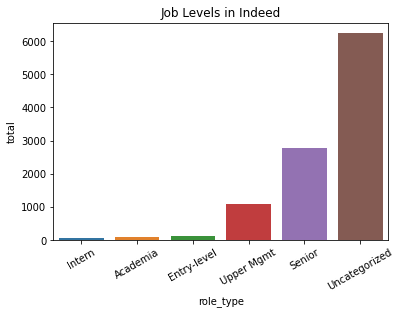

In [15]:
#Indeed 
g = sns.barplot(x='role_type', y='total', data=df_in, order=df_in.sort_values('total').role_type)
g.set_xticklabels(['Intern', 'Academia', 'Entry-level', 'Upper Mgmt', 'Senior', 'Uncategorized'],
rotation=30)
g.set(title='Job Levels in Indeed')

[Text(0.5, 1.0, 'Job Levels in CareerOneStop')]

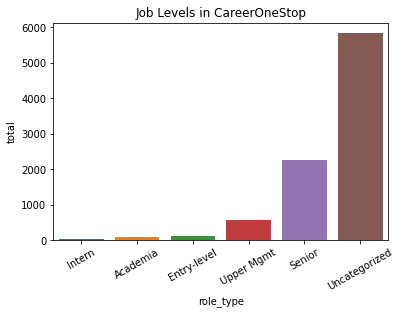

In [16]:
#CareerOneStop 
g = sns.barplot(x='role_type', y='total', data=df_cos, order=df_cos.sort_values('total').role_type)
g.set_xticklabels(['Intern', 'Academia', 'Entry-level', 'Upper Mgmt', 'Senior', 'Uncategorized'],
rotation=30)
g.set(title='Job Levels in CareerOneStop')

[Text(0.5, 1.0, 'Job Levels in USAJOBS')]

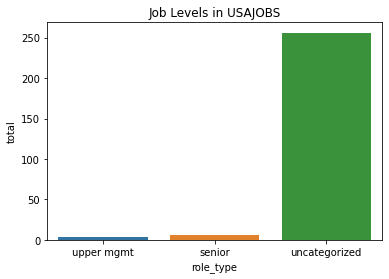

In [17]:
#USAJOBS
g = sns.barplot(x='role_type', y='total', data=df_usa, order=df_usa.sort_values('total').role_type)
g.set(title='Job Levels in USAJOBS')

In [18]:
#Creating function to evaluate position type column (e.g. full-time, part-time, contract, etc.)
def pos_type(x):
    if x == '["full-time"]':
        return 'full-time'
    elif 'permanent' in x:
        return 'full-time'
    elif 'tenure' in x :
        return 'academia'
    elif 'internship' in x:
        return 'internship'
    elif 'apprenticeship' in x:
        return 'internship'
    else: 
        return 'contract'

df['pos_type'] = df['job_type'].apply(pos_type)

In [20]:
df_in_pos = df_in = df.groupby('pos_type').count().reset_index()[['pos_type', 'job_title']]
df_in_pos.rename(columns = {'job_title':'total'}, inplace=True)
df_in_pos

,pos_type,total
0,academia,21
1,contract,2782
2,full-time,7570
3,internship,43
